*Lot of materials in today's workshop (including text, code, and figures) were adapted from the "SciPy 2017 Scikit-learn Tutorial" by Alexandre Gramfort and Andreas Mueller. The contents of their tutorial are licensed under Creative Commons CC0 1.0 Universal License as work dedicated to the public domain, and can be found at https://github.com/amueller/scipy-2017-sklearn.*

# Unsupervised Learning 

Defination on wikipedia: Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Clustering

Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity)
measure, such as the Euclidean distance.

<img width="60%" src='figures/clustering.png'/>

In this section we will explore a basic clustering task on some synthetic and real-world datasets.

Here are some common applications of clustering algorithms:
- grouping related web news (e.g. Google News) and web search results
- grouping related stock quotes for investment portfolio management
- building customer profiles for market analysis


Let's start by creating a simple, 2-dimensional, synthetic dataset:

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

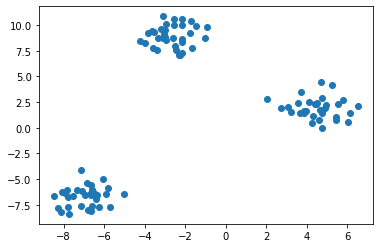

In [7]:
plt.scatter(X[:, 0], X[:, 1]);

In the scatter plot above, we can see three separate groups of data points and we would like to recover them using clustering -- think of "discovering" the class labels that we already take for granted in a classification task.

Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space, which we can't visualize in a single histogram or scatterplot.

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimized. The standard implementation of K-means uses the Euclidean distance, which is why we want to make sure that all our variables are measured on the same scale if we are working with real-world datastets. In the previous notebook, we talked about one technique to achieve this, namely, standardization.

<img width="60%" src='figures/kmean_iteration.gif'/>

<br/>
<div class="alert alert-success">
    <b>Question</b>:
     <ul>
      <li>
      what would you expect the output to look like?
      </li>
    </ul>
</div>

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [9]:
labels = kmeans.fit_predict(X)

In [10]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [11]:
np.all(y == labels)

False

Let's visualize the assignments that have been found

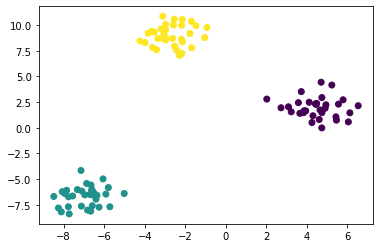

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

Compared to the true labels:

Here, we are probably satisfied with the clustering results. But in general we might want to have a more quantitative evaluation. How about comparing our cluster labels with the ground truth we got when generating the blobs?

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

Accuracy score: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [14]:
np.mean(y == labels)

0.0

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary,
and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [15]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

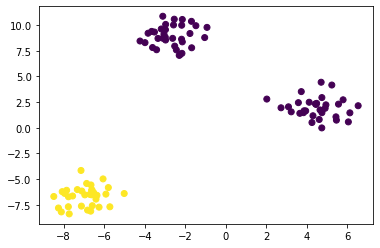

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [17]:
kmeans.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

#### The Elbow Method

The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster dispersion for different values of k:

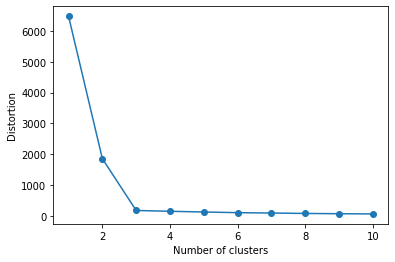

In [18]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be k=3 in this case, which makes sense given our visual expection of the dataset previously.

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.


We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

Text(0.5, 1.0, 'Unevenly Sized Blobs')

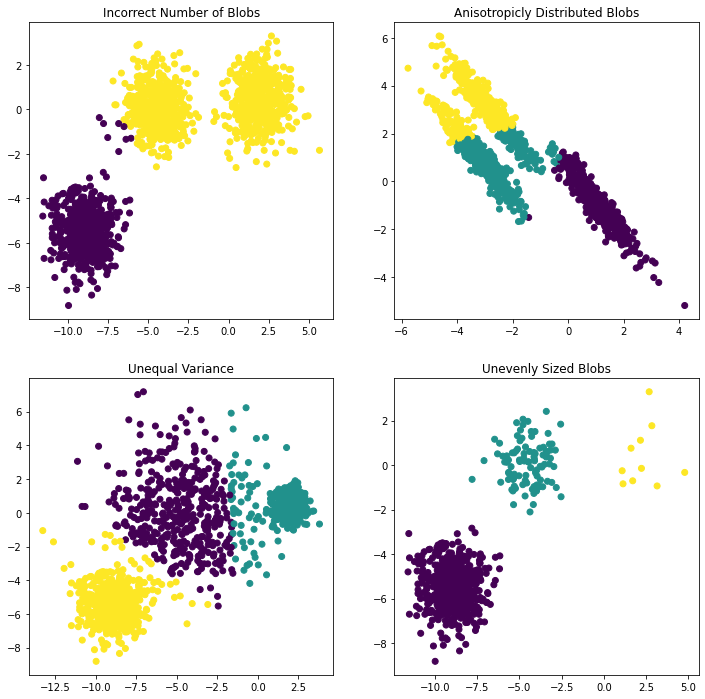

In [19]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")


## Transformation and Dimensionality Reduction

Many instances of unsupervised learning, such as dimensionality reduction, manifold learning find a new representation of the input data without any additional input. (In contrast to supervised learning, usnupervised algorithms don't require or consider target variables like in the previous classification and regression examples). 

<img src="figures/unsupervised_workflow.svg" width="100%">

#### Why Dimensionality Reduction?

There are a number of reasons! Here are a few:

1. Reducing the number of dimensions is a way we can eliminate noise variables from our data allowing for better models, we'll see an example of this with the Wisconsin Cancer data.

2. Your data is too big. This is common with image classification problems like the MNIST data.

3. Humans can only see in 2 or 3 dimensions, and interesting data sets often have many more dimensions than that.


I've hopefully convinced you of the importance of dimensionality reduction. 

### Principal Component Analysis
============================

An unsupervised transformation that is somewhat more interesting is Principal Component Analysis (PCA).
It is a technique to reduce the dimensionality of the data, by creating a linear projection.
That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it). Thus, we can think of PCA as a projection of our data onto a *new* feature space.

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. Here, the premise is to reduce the size (dimensionality) of a dataset while capturing most of its information. There are many reason why dimensionality reduction can be useful: It can reduce the computational cost when running learning algorithms, decrease the storage space, and may help with the so-called "curse of dimensionality," which we will discuss in greater detail later.

To illustrate how a rotation might look like, we first show it on two-dimensional data and keep both principal components. Here is an illustration:

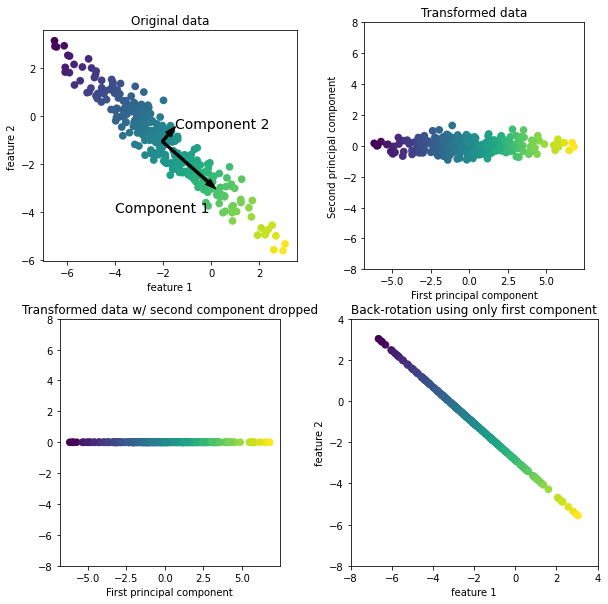

In [31]:
from figures import plot_pca
plot_pca.plot_pca_illustration()

Now let's go through all the steps in more detail:
We create a Gaussian blob that is rotated:

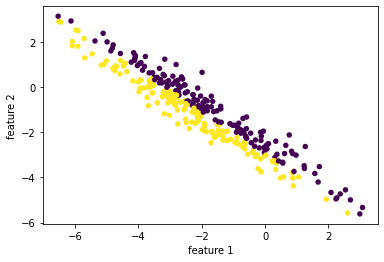

In [33]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

As always, we instantiate our PCA model. By default all directions are kept.

In [39]:
from sklearn.decomposition import PCA
pca = PCA()

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [40]:
pca.fit(X_blob)

PCA()

Then we can transform the data, projected on the principal components:

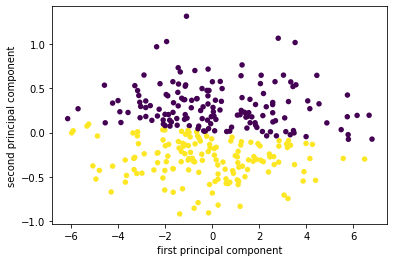

In [41]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");

In [42]:
pca = PCA(n_components=1).fit(X_blob)

In [43]:
X_blob.shape

(300, 2)

In [48]:
X_pca = pca.transform(X_blob)
X_pca.shape

(300, 1)

Text(0.5, 0, 'first principal component')

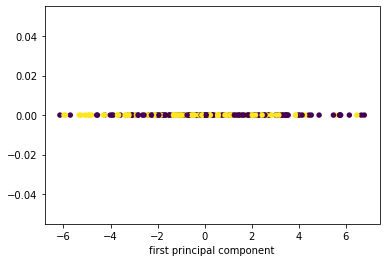

In [49]:
plt.scatter(X_pca[:, 0],np.zeros(X_pca.shape[0]), c=y, linewidths=0, s=30)
plt.xlabel("first principal component")

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [53]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

data consists of 8×8 pixel images, meaning that they are 64-dimensional. 

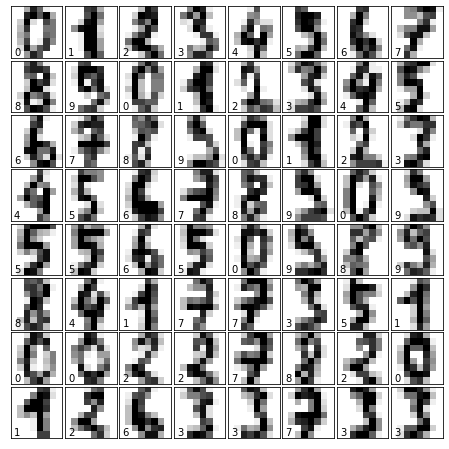

In [54]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [55]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

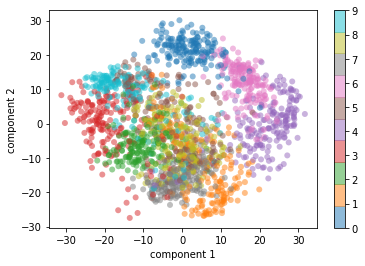

In [58]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap("tab10",10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0.5, 1.0, 'PCA clsutering MNIST')

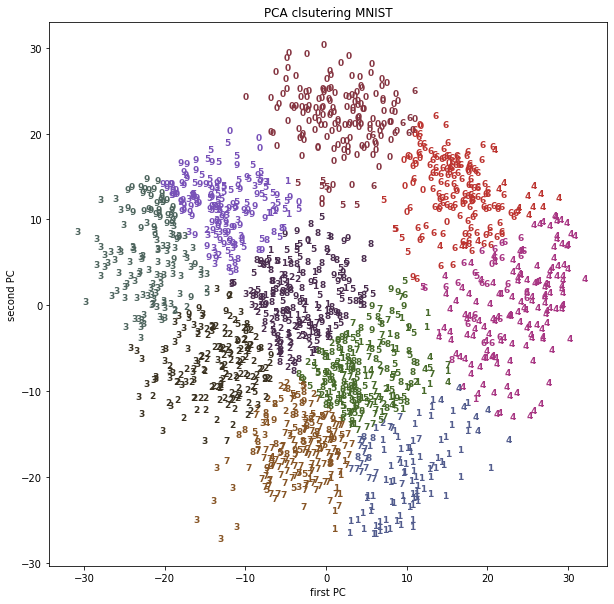

In [68]:
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E', 'black']


km = KMeans(n_clusters=10, random_state=0)
km = km.fit(projected)
clusters_km = km.predict(projected)

plt.figure(figsize=(10, 10)) 
plt.scatter(projected[:,0], projected[:,1], s=50, color="w")
for i in range(len(digits.target)):
    plt.text(projected[i,0], projected[i,1], str(digits.target[i]),
             color = colors[clusters_km[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel("first PC")
plt.ylabel("second PC")
plt.title("PCA KMeans clsutering MNIST")

## Density-Based Spatial Clustering of Application with Noise (DBSCAN)

This technique focuses on the density of the points in the feature space. 

The main concept behind DBSCAN is that dense regions of data are the result of clusters, and that sparse regions of data are the result of noise.

The DBSCAN algorithm goes through and labels each point as a core point, border point, or noise. Noise is thrown out and, in `sklearn`, labeled as $-1$. It then joins core points that are within each other's neighborhoods, these collections of core points are the foundations of our clusters. Finally border points are assigned to the cluster to which they are closest.

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

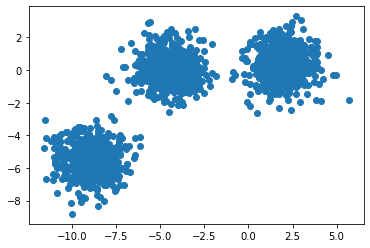

In [70]:
plt.scatter(X[:, 0], X[:, 1]);

Text(0.5, 1.0, 'Unevenly Sized Blobs')

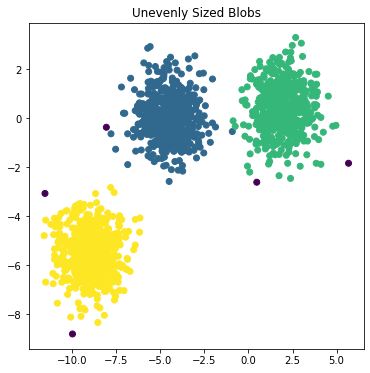

In [76]:
db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_
plt.figure(figsize=(6, 6)) 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Unevenly Sized Blobs")